# Data analysis with python notes

## Installing the software

1. Install [Anaconda](http://docs.continuum.io/anaconda/install)
2. Run Launcher or iPython notebook
3. Browse to http://localhost:8888
4. Create a new notebook, or open an existing `.ipnb` file.

## Useful resources

* [Markdown help](https://help.github.com/articles/markdown-basics/)
* Help > Keyboard shortcuts

## Starting data analysis

Data analysis often starts with a question, or some data. 

You can find interesting data on websites like:
* Trade data - [comtrade](http://comtrade.un.org/data/)
* Health data - [WHO](http://apps.who.int/gho/data/?theme=home)
* Weather data - [weather underground](http://www.wunderground.com/)

## Data types in pandas

The Series data type is a collection of values with an integer index that starts from zero. Each column in a dataframe is an example of the Series data type. The Series data type has many of the same methods as the DataFrame data type.

The object data type is how pandas represents strings.

The datetime64 data type is how pandas represents dates.

The int64 data type is how pandas represents integers (whole numbers).

The float64 data type is how pandas represents floating point numbers (decimals).

## Loading the pandas module

In [197]:
from pandas import *

## Loading data

### Loading data from Excel spreadsheet

In [198]:
data = read_excel('WHO POP TB some.xls')
data

,Country,Population (1000s),TB deaths
0,Angola,21472,6900
1,Brazil,200362,4400
2,China,1393337,41000
3,Equatorial Guinea,757,67
4,Guinea-Bissau,1704,1200
5,India,1252140,240000
6,Mozambique,25834,18000
7,Portugal,10608,140
8,Russian Federation,142834,17000
9,Sao Tome and Principe,193,18


### Loading data from csv

In [199]:
df = read_csv('WHO POP TB all.csv')
df.head() ## show only the first 5 rows

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00


## Selecting a column

The column name must be written *exactly* as given in the dataframe, otherwise you'll get a **key error**. You can check this with the `.columns` property of a dataframe.

In [200]:
data.columns

Index(['Country', 'Population (1000s)', 'TB deaths'], dtype='object')

In [201]:
data['TB deaths']

0       6900
1       4400
2      41000
3         67
4       1200
5     240000
6      18000
7        140
8      17000
9         18
10     25000
11       990
Name: TB deaths, dtype: int64

## Calculations on a column

In [202]:
deaths = data['TB deaths']
deaths.sum()

354715

In [203]:
deaths.max()

240000

In [204]:
deaths.min()

18

In [205]:
deaths.mean()

29559.583333333332

In [206]:
deaths.median()

5650.0

## Sorting on a column

In [207]:
data.sort('TB deaths')

,Country,Population (1000s),TB deaths
9,Sao Tome and Principe,193,18
3,Equatorial Guinea,757,67
7,Portugal,10608,140
11,Timor-Leste,1133,990
4,Guinea-Bissau,1704,1200
1,Brazil,200362,4400
0,Angola,21472,6900
8,Russian Federation,142834,17000
6,Mozambique,25834,18000
10,South Africa,52776,25000


In [208]:
data.sort('TB deaths', ascending=False)

,Country,Population (1000s),TB deaths
5,India,1252140,240000
2,China,1393337,41000
10,South Africa,52776,25000
6,Mozambique,25834,18000
8,Russian Federation,142834,17000
0,Angola,21472,6900
1,Brazil,200362,4400
4,Guinea-Bissau,1704,1200
11,Timor-Leste,1133,990
7,Portugal,10608,140


Note, this doesn't modify the original variable.

In [209]:
data

,Country,Population (1000s),TB deaths
0,Angola,21472,6900
1,Brazil,200362,4400
2,China,1393337,41000
3,Equatorial Guinea,757,67
4,Guinea-Bissau,1704,1200
5,India,1252140,240000
6,Mozambique,25834,18000
7,Portugal,10608,140
8,Russian Federation,142834,17000
9,Sao Tome and Principe,193,18


## Calculations over values

In [210]:
values = [1,2,3]
sum(values)

6

In [211]:
max(values)

3

In [212]:
min(values)

1

In [213]:
import numpy as np
np.mean(values)

2.0

In [214]:
np.median(values)

2.0

## Calculations over columns

In [215]:
deathsColumn = data['TB deaths']
populationColumn = data['Population (1000s)']
## remember, units can be tricky!
rateColumn = deathsColumn * 100 / populationColumn
data['TB deaths (per 100000)'] = rateColumn
data

,Country,Population (1000s),TB deaths,TB deaths (per 100000)
0,Angola,21472,6900,32.134873
1,Brazil,200362,4400,2.196025
2,China,1393337,41000,2.942576
3,Equatorial Guinea,757,67,8.850727
4,Guinea-Bissau,1704,1200,70.422535
5,India,1252140,240000,19.167186
6,Mozambique,25834,18000,69.675621
7,Portugal,10608,140,1.319759
8,Russian Federation,142834,17000,11.901928
9,Sao Tome and Principe,193,18,9.326425


In [216]:
## calculate range
populationColumn.max() - populationColumn.min()

1393144

In [217]:
def calcRange(values):
    return values.max() - values.min()
calcRange(populationColumn)

1393144

## Writing up the analysis

Structure:
1. A descriptive title
2. An introduction setting the context and stating what you want to find out with the data.
3. A section detailing the source(s) of the data, with the code to load it into the notebook.
4. One or more sections showing the processes (calculating statistics, sorting the data, etc.) necessary to address the questions.
5. A conclusion summarising your findings, with qualitative analysis of the quantitative results and critical reflection on any shortcomings in the data or analysis process.

## Getting dataframe rows

In [218]:
## Get the third row of the dataframe df
df.irow(2)

Country               Algeria
Population (1000s)      39208
TB deaths                5100
Name: 2, dtype: object

In [219]:
## Get the first 7 rows of dataframe df
df.head(7)

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00
5,Antigua and Barbuda,90,1.20
6,Argentina,41446,570.00


In [220]:
## Get the last 3 rows
df.tail(3)

,Country,Population (1000s),TB deaths
191,Yemen,24407,990
192,Zambia,14539,3600
193,Zimbabwe,14150,5700


## Getting dataframe columns

In [221]:
df['TB deaths'].head() ## as a series

0    13000.00
1       20.00
2     5100.00
3        0.26
4     6900.00
Name: TB deaths, dtype: float64

In [222]:
df['TB deaths'].irow(2) ## as a value

5100.0

In [223]:
df[['Country']].head() ## as a dataframe

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola


In [224]:
df[['Country', 'Population (1000s)']].head() ## multiple columns

,Country,Population (1000s)
0,Afghanistan,30552
1,Albania,3173
2,Algeria,39208
3,Andorra,79
4,Angola,21472


## Using comparison operators to select rows

`== 	equals`

`!= 	not equal`

`< 	less than`

`> 	greater than`

`<= 	less than or equal to`

`>= 	greater than or equal to`

In [225]:
df[df['Country'] < 'B']

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00
5,Antigua and Barbuda,90,1.20
6,Argentina,41446,570.00
7,Armenia,2977,170.00
8,Australia,23343,45.00
9,Austria,8495,29.00


In [226]:
df[df['Population (1000s)'] > 80000]

,Country,Population (1000s),TB deaths
13,Bangladesh,156595,80000
23,Brazil,200362,4400
36,China,1393337,41000
53,Egypt,82056,550
58,Ethiopia,94101,30000
65,Germany,82727,300
77,India,1252140,240000
78,Indonesia,249866,64000
85,Japan,127144,2100
109,Mexico,122332,2200


## Bitwise operators

`|` or

`&` and

In [227]:
population = df['Population (1000s)']
deaths = df['TB deaths']
df[(population > 80000) & (deaths > 10000)]

,Country,Population (1000s),TB deaths
13,Bangladesh,156595,80000
36,China,1393337,41000
58,Ethiopia,94101,30000
77,India,1252140,240000
78,Indonesia,249866,64000
124,Nigeria,173615,160000
128,Pakistan,182143,49000
134,Philippines,98394,27000
141,Russian Federation,142834,17000
190,Viet Nam,91680,17000


In [228]:
## find all the countries where the Population (1000s) 
## is less than or equal to 50000 or TB deaths are 
## greater than or equal to 20000
df[(population <= 50) | (deaths >= 20000)]

,Country,Population (1000s),TB deaths
13,Bangladesh,156595,80000.00
36,China,1393337,41000.00
40,Cook Islands,21,0.41
47,Democratic Republic of the Congo,67514,46000.00
58,Ethiopia,94101,30000.00
77,India,1252140,240000.00
78,Indonesia,249866,64000.00
111,Monaco,38,0.03
116,Myanmar,53259,26000.00
118,Nauru,10,0.67


## Getting weather data from wunderground

### As a csv file

1. Visit http://www.wunderground.com/history
2. Type a location in the Location input box, and select a suggestion. Ignore the date pull down menus and click ‘Submit’.
3. Select the ‘Custom’ tab.
5. From the drop down date menus select the time period you want. The data for that period should then be displayed.
6. Scroll to the end of the data and then right click on the blue link labelled ‘Comma Delimited File’.
7. Choose to save the file via ‘Download Linked File As…’ or ‘Save Link As…’ Save the file with its default name of CustomHistory to your downloads folder.
8. Once the file has been downloaded, rename it from CustomHistory.html to a named csv file and put it in the same folder as your notebooks.
9. Load the csv into a dataframe

In [229]:
from pandas import *
london = read_csv('London_2014.csv')
london.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66,9.91,4,Rain,186<br />
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50,1.02,2,Rain,214<br />
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69,7.11,2,Rain-Thunderstorm,219<br />
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39,9.91,4,Rain,211<br />
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5,Rain,199<br />


## Data cleaning

### Remove rogue spaces

In [230]:
london = read_csv('London_2014.csv', skipinitialspace=True)
london.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

### Removing extra characters

In [231]:
london = london.rename(columns={'WindDirDegrees<br />':'WindDirDegrees'})
london.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [232]:
london['WindDirDegrees'].head()

0    186<br />
1    214<br />
2    219<br />
3    211<br />
4    199<br />
Name: WindDirDegrees, dtype: object

In [233]:
london['WindDirDegrees'] = london['WindDirDegrees'].str.rstrip('<br />')
london['WindDirDegrees'].head()

0    186
1    214
2    219
3    211
4    199
Name: WindDirDegrees, dtype: object

### Missing values

In [234]:
london['Events'].isnull().sum()

114

In [235]:
london[london['Events'].isnull()]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
32,2014-2-2,10,8,5,4,3,1,93,71,43,...,31,16,10,37,24,47,0.00,2,NaN,216
33,2014-2-3,8,6,3,5,3,2,93,79,55,...,31,15,10,32,18,NaN,0.00,4,NaN,133
43,2014-2-13,8,6,3,2,1,-1,81,66,45,...,31,15,10,42,27,48,0.00,2,NaN,236
52,2014-2-22,12,8,4,5,3,1,87,68,38,...,31,16,10,29,21,NaN,0.00,2,NaN,228
63,2014-3-5,13,7,0,4,2,-1,100,72,40,...,31,15,8,21,6,NaN,0.25,1,NaN,248
64,2014-3-6,13,9,5,7,5,3,93,77,50,...,31,15,7,32,14,42,0.00,2,NaN,206
66,2014-3-8,16,11,7,7,4,2,93,65,29,...,31,11,6,27,18,NaN,0.00,6,NaN,156
67,2014-3-9,19,12,6,7,4,3,81,58,28,...,26,9,5,24,10,34,0.00,NaN,NaN,170
68,2014-3-10,13,8,4,8,4,2,87,73,57,...,31,12,6,23,8,NaN,0.00,6,NaN,27
70,2014-3-12,16,9,2,8,4,1,93,76,40,...,19,9,3,11,8,NaN,0.00,4,NaN,31


In [236]:
london['Events'] = london['Events'].fillna('')
len(london[london['Events'].isnull()])

0

### Changing the value types of columns

In [237]:
london.dtypes

GMT                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

In [238]:
london['WindDirDegrees'] = london['WindDirDegrees'].astype('int64')
london[london['WindDirDegrees'] > 350]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
100,2014-4-11,16,12,9,5,4,2,71,53,28,...,31,18,10,13,8,NaN,0.00,1,,351
110,2014-4-21,19,12,5,11,8,4,100,78,31,...,26,7,0,14,6,NaN,9.91,3,Fog-Rain-Thunderstorm,356
249,2014-9-7,21,17,13,14,12,8,94,71,41,...,23,10,2,11,6,NaN,0.00,4,,354
250,2014-9-8,22,16,10,13,9,7,94,64,28,...,27,12,5,11,6,NaN,0.00,1,,351
335,2014-12-2,8,7,6,7,4,2,100,80,62,...,31,11,1,27,13,NaN,1.02,5,Rain,359


In [239]:
london['GMT'] = to_datetime(london['GMT'])
#Then display the types of all the columns again so we
#can check the changes have been made.
london.dtypes

GMT                           datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

In [240]:
london[london['GMT'] == '2014-1-3']

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
2,2014-01-03,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69,7.11,2,Rain-Thunderstorm,219


In [241]:
datetime(2014, 6, 4)

datetime.datetime(2014, 6, 4, 0, 0)

In [242]:
london[london['GMT'] == datetime(2014, 6, 4)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
154,2014-06-04,14,11,8,11,9,3,94,78,47,...,31,12,7,47,13,64,2.03,4,Rain-Thunderstorm,230


In [243]:
london[(london['GMT'] >= datetime(2014, 12, 8)) 
      & (london['GMT'] <= datetime(2014, 12, 12))]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
341,2014-12-08,7,4,1,2,1,-1,93,76,51,...,31,17,10,23,13,NaN,0.00,2,Rain,270
342,2014-12-09,12,6,-1,11,3,-1,100,86,64,...,31,15,3,37,14,52,0.25,5,Rain,224
343,2014-12-10,9,7,6,11,3,1,90,70,44,...,31,18,3,40,27,NaN,0.00,2,Rain,246
344,2014-12-11,10,8,5,6,3,2,82,72,51,...,31,15,10,40,31,NaN,0.25,2,Rain,246
345,2014-12-12,9,6,2,9,4,-1,94,79,59,...,31,11,3,40,26,55,1.02,3,Rain,253


## Plotting

In [244]:
%matplotlib inline

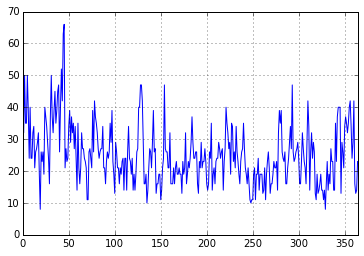

In [245]:
london['Max Wind SpeedKm/h'].plot(grid=True)

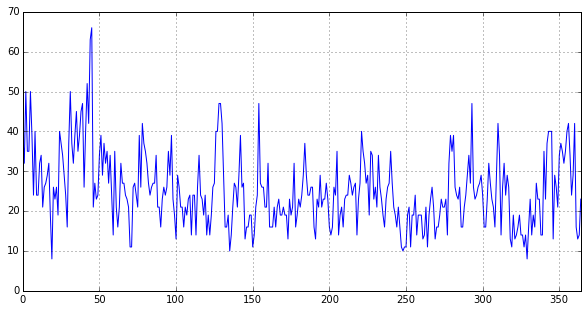

In [246]:
## change plot size
london['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

## Changing a dataframe's index

In [247]:
london.head(2)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-01-01,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66,9.91,4,Rain,186
1,2014-01-02,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50,1.02,2,Rain,214


In [248]:
london.index = london['GMT']
#Display the first 2 rows
london.head(2)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66,9.91,4,Rain,186
2014-01-02,2014-01-02,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50,1.02,2,Rain,214


In [249]:
## you can still access numbered row using irow
london.irow(0)

GMT                           2014-01-01 00:00:00
Max TemperatureC                               11
Mean TemperatureC                               8
Min TemperatureC                                6
Dew PointC                                      9
MeanDew PointC                                  7
Min DewpointC                                   4
Max Humidity                                   94
Mean Humidity                                  86
Min Humidity                                   73
Max Sea Level PressurehPa                    1002
Mean Sea Level PressurehPa                    993
Min Sea Level PressurehPa                     984
Max VisibilityKm                               31
Mean VisibilityKm                              11
Min VisibilitykM                                2
Max Wind SpeedKm/h                             40
Mean Wind SpeedKm/h                            26
Max Gust SpeedKm/h                             66
Precipitationmm                              9.91


In [250]:
## but now you can also access it with date
london.ix[datetime(2014, 1, 1)]

GMT                           2014-01-01 00:00:00
Max TemperatureC                               11
Mean TemperatureC                               8
Min TemperatureC                                6
Dew PointC                                      9
MeanDew PointC                                  7
Min DewpointC                                   4
Max Humidity                                   94
Mean Humidity                                  86
Min Humidity                                   73
Max Sea Level PressurehPa                    1002
Mean Sea Level PressurehPa                    993
Min Sea Level PressurehPa                     984
Max VisibilityKm                               31
Mean VisibilityKm                              11
Min VisibilitykM                                2
Max Wind SpeedKm/h                             40
Mean Wind SpeedKm/h                            26
Max Gust SpeedKm/h                             66
Precipitationmm                              9.91


In [251]:
## and queries can be made more easily
london[(london['GMT'] >= datetime(2014, 12, 8)) 
      & (london['GMT'] <= datetime(2014, 12, 12))]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-12-08,2014-12-08,7,4,1,2,1,-1,93,76,51,...,31,17,10,23,13,NaN,0.00,2,Rain,270
2014-12-09,2014-12-09,12,6,-1,11,3,-1,100,86,64,...,31,15,3,37,14,52,0.25,5,Rain,224
2014-12-10,2014-12-10,9,7,6,11,3,1,90,70,44,...,31,18,3,40,27,NaN,0.00,2,Rain,246
2014-12-11,2014-12-11,10,8,5,6,3,2,82,72,51,...,31,15,10,40,31,NaN,0.25,2,Rain,246
2014-12-12,2014-12-12,9,6,2,9,4,-1,94,79,59,...,31,11,3,40,26,55,1.02,3,Rain,253


In [252]:
## And even more succinctly
london.ix[datetime(2014,12,8) : datetime(2014,12,12)]

#The meaning of the above code is get the rows between 
#and including the indices datetime(2014,12,8) and 
#datetime(2014,12,12)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-12-08,2014-12-08,7,4,1,2,1,-1,93,76,51,...,31,17,10,23,13,NaN,0.00,2,Rain,270
2014-12-09,2014-12-09,12,6,-1,11,3,-1,100,86,64,...,31,15,3,37,14,52,0.25,5,Rain,224
2014-12-10,2014-12-10,9,7,6,11,3,1,90,70,44,...,31,18,3,40,27,NaN,0.00,2,Rain,246
2014-12-11,2014-12-11,10,8,5,6,3,2,82,72,51,...,31,15,10,40,31,NaN,0.25,2,Rain,246
2014-12-12,2014-12-12,9,6,2,9,4,-1,94,79,59,...,31,11,3,40,26,55,1.02,3,Rain,253


In [253]:
## we're sure the data is in date order, but if not we could sort it
london = london.sort_index()

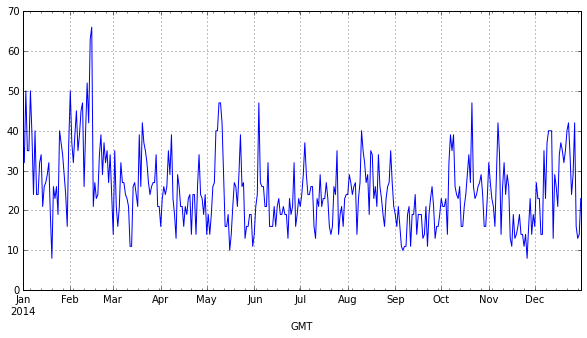

In [254]:
london['Max Wind SpeedKm/h'].plot(grid=True, figsize=(10,5))

## Some useful functions

`asType(aType)` when applied to a dataframe column, the method changes the data type of each value in that column to the type given by the string aType.

`datetime(yyyy, mm, dd)` the function takes three arguments, `yyyy` a four digit integer representing a year, `mm` a two digit integer representing a month and `dd` a two digit integer representing a day. From these arguments the function creates and returns a value of `datetime64`.

`dropna()` when applied to a dataframe returns a new dataframe without the rows that have at least one missing value.

`head()` gets and displays the first five rows of a dataframe. Optionally the method can take an integer argument to specify how many rows (from and including row 0) to get and display.

`irow(index)` gets and displays the row in the dataframe indicated by argument index.

`isnull()` is a series method that checks which rows in that series have a missing value.

`fillna(value)` is a series method that returns a new series in which all missing values have been filled with the given value.

`plot()` when applied to a dataframe column of numeric values, the method displays a graph of those values. The x-axis shows the dataframe’s index and the y-axis the range of the column’s values. Before the method is called you first need to execute `%matplotlib inline`.

`read_csv(csvFile)` creates a dataframe from the dataset in the CSV file.

`rename(columns={oldName : newName})` renames the column `oldName` to `newName`.

`str.rstrip(suffix)` when applied to a dataframe column of string values, the method removes the argument suffix from the end of each string value in the column.

`tail()` gets and displays the last five rows of a dataframe. Optionally the method can take an integer argument to specify how many rows (until and including the last row) to get and display.

`to_datetime(aSeries)` when applied to a series, typically a column from a dataframe, this function returns a new series in which each value in `aSeries` has been changed to type `datetime64`.

## Transforming and combining data

In [255]:
headings = ['Country name', 'Life expectancy (years)']
table = [
   ['China', 75],
   ['Russia', 71],  
   ['United States', 79],
   ['India', 66],
   ['United Kingdom', 81]
]
life = DataFrame(columns=headings, data=table)
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


## Applying functions

In [256]:
def roundToMillions (value):
    result = round(value / 1000000)
    return result

In [257]:
roundToMillions(4567890.1) == 5

True

In [258]:
roundToMillions(0) == 0  # always test with zero...

True

In [259]:
roundToMillions(-1) == 0 # ...and negative numbers

True

In [260]:
roundToMillions(1499999) == 1 # test rounding to the nearest

True

In [261]:
def usdToGBP (usd):
    return usd / 1.564768 # average rate during 2013 

In [262]:
usdToGBP(0) == 0

True

In [263]:
usdToGBP(1.564768) == 1

True

In [264]:
usdToGBP(-1) < 0

True

In [265]:
usdToGBP(-1) < 0

True

In [266]:
def expandCountry (name):
    if name == 'UK':
        name = 'United Kingdom'
    if name == 'USA':
        name = 'United States'
    return name

expandCountry('India') == 'India'

True

In [267]:
HEADING_COUNTRY = 'Country'
HEADING_COUNTRY_NAME = 'Country name'
HEADING_GDP_US = 'GDP (US$)'
headings = [HEADING_COUNTRY, HEADING_GDP_US]
table = [
  ['UK', 2678454886796.7],    # 1st row
  ['USA', 16768100000000.0],  # 2nd row
  ['China', 9240270452047.0], # and so on...
  ['Brazil', 2245673032353.8],
  ['South Africa', 366057913367.1]
]
gdp = DataFrame(columns=headings, data=table)
gdp[HEADING_COUNTRY_NAME] = gdp[HEADING_COUNTRY].apply(expandCountry)
gdp

,Country,GDP (US$),Country name
0,UK,2.678455e+12,United Kingdom
1,USA,1.676810e+13,United States
2,China,9.240270e+12,China
3,Brazil,2.245673e+12,Brazil
4,South Africa,3.660579e+11,South Africa


In [268]:
HEADING_GDP_POUND = 'GDP (£m)'
HEADING_GDP_USD = 'GDP (US$)'
gdp[HEADING_GDP_POUND] = gdp[HEADING_GDP_USD].apply(usdToGBP).apply(roundToMillions)
gdp

,Country,GDP (US$),Country name,GDP (£m)
0,UK,2.678455e+12,United Kingdom,1711727
1,USA,1.676810e+13,United States,10716029
2,China,9.240270e+12,China,5905202
3,Brazil,2.245673e+12,Brazil,1435148
4,South Africa,3.660579e+11,South Africa,233937


In [269]:
headings = [HEADING_COUNTRY_NAME, HEADING_GDP_POUND]
gdp = gdp[headings]
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


## Joining left, right and centre

In [270]:
life

,Country name,Life expectancy (years)
0,China,75
1,Russia,71
2,United States,79
3,India,66
4,United Kingdom,81


In [271]:
gdp

,Country name,GDP (£m)
0,United Kingdom,1711727
1,United States,10716029
2,China,5905202
3,Brazil,1435148
4,South Africa,233937


A **left join** takes the rows of the left table and adds the columns of the right table.

In [272]:
merge(gdp, life, on=HEADING_COUNTRY_NAME, how='left')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Brazil,1435148,NaN
4,South Africa,233937,NaN


A **right join** takes the rows from the right table, and adds the columns of the left table.

In [273]:
merge(gdp, life, on=HEADING_COUNTRY_NAME, how='right')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Russia,NaN,71
4,India,NaN,66


An **outer join** takes the union of the rows, i.e. it has all the rows of the left and right joins.

In [274]:
merge(gdp,life,on=HEADING_COUNTRY_NAME, how='outer')

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75
3,Brazil,1435148,NaN
4,South Africa,233937,NaN
5,Russia,NaN,71
6,India,NaN,66


An **inner join** takes the intersection of the rows (i.e. the common rows) of the left and right joins.

In [275]:
merge(gdp,life,on=HEADING_COUNTRY_NAME, how="inner")

,Country name,GDP (£m),Life expectancy (years)
0,United Kingdom,1711727,81
1,United States,10716029,79
2,China,5905202,75


## Constant variables

Constants are used to represent fixed values (e.g. strings and numbers) that occur frequently in a program. Constant names are conventionally written in uppercase, with underscores to separate multiple words.

In [276]:
GDP_USD = 'GDP (US$)'
GDP_GBP = 'GDP (£m)'
GDP_USD

'GDP (US$)'

## Directly download data from the World Bank

In [289]:
from pandas.io.wb import download

## Example where we use help to find out parameters
## Results show up in a pop up window
#?download

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdp = download(indicator=GDP_INDICATOR, country='all', start=YEAR, end=YEAR)
LIFE_INDICATOR = 'SP.DYN.LE00.IN'
life = download(indicator=LIFE_INDICATOR, country='all', start=YEAR, end=YEAR)
life.head()

,,SP.DYN.LE00.IN
country,year,
Arab World,2013,70.085925
Caribbean small states,2013,72.000083
Central Europe and the Baltics,2013,76.127583
East Asia & Pacific (all income levels),2013,74.894858
East Asia & Pacific (developing only),2013,73.982971


The downloaded dataframe has descriptive row names instead of the usual 0, 1, 2, etc. In othe words, the dataframe's  index is given by the country and year instead of integers. Resetting the index puts the dataframe into the usual form. 

In [278]:
gdp = gdp.reset_index()
life = life.reset_index()
life.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.085925
1,Caribbean small states,2013,72.000083
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.894858
4,East Asia & Pacific (developing only),2013,73.982971


## Cleaning up

The first 34 rows (from 0 to 33) of World Bank dataframes are aggregated data for country groups, and are thus discarded.

In [279]:
life = life[34:]
life.head()

,country,year,SP.DYN.LE00.IN
34,Afghanistan,2013,60.931415
35,Albania,2013,77.537244
36,Algeria,2013,71.009659
37,American Samoa,2013,NaN
38,Andorra,2013,NaN


Rows with missing data are dropped.

In [280]:
life = life.dropna()
life.head()

,country,year,SP.DYN.LE00.IN
34,Afghanistan,2013,60.931415
35,Albania,2013,77.537244
36,Algeria,2013,71.009659
39,Angola,2013,51.866171
40,Antigua and Barbuda,2013,75.829293


The year column is discarded.

In [281]:
COUNTRY = 'country'
headings = [COUNTRY, LIFE_INDICATOR]
life = life[headings]
life.head()

,country,SP.DYN.LE00.IN
34,Afghanistan,60.931415
35,Albania,77.537244
36,Algeria,71.009659
39,Angola,51.866171
40,Antigua and Barbuda,75.829293


In [282]:
gdp.head()

,country,year,NY.GDP.MKTP.CD
0,Arab World,2013,2.843483e+12
1,Caribbean small states,2013,6.680344e+10
2,Central Europe and the Baltics,2013,1.418166e+12
3,East Asia & Pacific (all income levels),2013,2.080794e+13
4,East Asia & Pacific (developing only),2013,1.168563e+13


## Joining and transforming

In [283]:
gdpVsLife = merge(gdp, life, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,year,NY.GDP.MKTP.CD,SP.DYN.LE00.IN
0,Afghanistan,2013,2.031088e+10,60.931415
1,Albania,2013,1.291667e+10,77.537244
2,Algeria,2013,2.101834e+11,71.009659
3,Angola,2013,1.241632e+11,51.866171
4,Antigua and Barbuda,2013,1.200588e+09,75.829293


A **method chain** is an expression like context.method1(args1).method2(args2).method3(args3) where each method has and returns the same type of context, except possibly the last method, which can return any type of value.

In [284]:
## dollars converted to million pounds
GDP = 'GDP (£m)'
column = gdpVsLife[GDP_INDICATOR]
gdpVsLife[GDP] = column.apply(usdToGBP).apply(roundToMillions)
gdpVsLife.head()

,country,year,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m)
0,Afghanistan,2013,2.031088e+10,60.931415,12980
1,Albania,2013,1.291667e+10,77.537244,8255
2,Algeria,2013,2.101834e+11,71.009659,134322
3,Angola,2013,1.241632e+11,51.866171,79349
4,Antigua and Barbuda,2013,1.200588e+09,75.829293,767


In [285]:
## life expectancy rounded
LIFE = 'Life expectancy (years)'
gdpVsLife[LIFE] = gdpVsLife[LIFE_INDICATOR].apply(round)
gdpVsLife.head()

,country,year,NY.GDP.MKTP.CD,SP.DYN.LE00.IN,GDP (£m),Life expectancy (years)
0,Afghanistan,2013,2.031088e+10,60.931415,12980,61
1,Albania,2013,1.291667e+10,77.537244,8255,78
2,Algeria,2013,2.101834e+11,71.009659,134322,71
3,Angola,2013,1.241632e+11,51.866171,79349,52
4,Antigua and Barbuda,2013,1.200588e+09,75.829293,767,76


In [286]:
## original gdp & life exp columns dropped
headings = [COUNTRY, GDP, LIFE]
gdpVsLife = gdpVsLife[headings]
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,12980,61
1,Albania,8255,78
2,Algeria,134322,71
3,Angola,79349,52
4,Antigua and Barbuda,767,76


## Correlation

The **p-value** is an indication of the significance of the result. Usually a p-value below 0.05 is taken to mean the result is statistically significant.

The **Spearman rank correlation coefficient** of two series of values (e.g. two columns) is a number from -1 (perfect inverse correlation) to 1 (perfect direct correlation), with 0 meaning there is no rank correlation. Correlation doesn’t imply causation. A rank correlation of 1 merely states that both values increase and decrease together, while a correlation of -1 states that if one value increases, the other decreases.

The Spearman rank correlation coefficient between GDP and life expectancy, and the corresponding p-value are calculated as follows.

In [287]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
def analyseCorrelation(correlation, pValue):
    print('The correlation is', correlation)
    if pValue < 0.05:
        print('It is statistically significant.')
    else:
        print('It is not statistically significant.')
analyseCorrelation(correlation, pValue)

The correlation is 0.497024295841
It is statistically significant.


## Scatterplots

In a **logarithmic scale**, each major tick represents a value that is the multiplication by some constant (usually 10) of the value of the previous major tick.

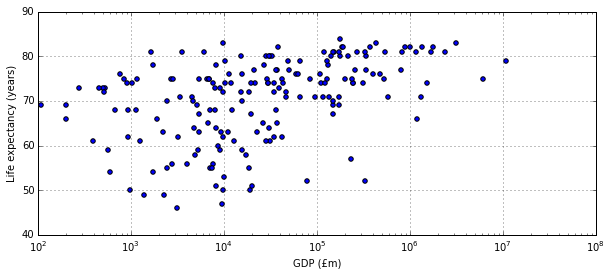

In [288]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize = (10, 4))

## Some useful functions 

`col.apply(functionName)` returns a new column, obtained by applying the given one-argument function to each cell in column col.

`DataFrame(columns=listOfStrings, data=listOfLists)` returns a new dataframe, given the data as a list of rows, each row being a list of values in column order.

`download(indicator=string, country='all', start=number, end=number)` is a function in the `pandas.io.wb` module that downloads the World Bank data for the given indicator and all countries and country groups from the given start year to the given end year.

`merge(left=frame1, right=frame2, on=columnName, how=string)` returns a new dataframe, obtained by joining the two frames on the columns with the given common name. The how argument can be one of ‘left’, ‘right’, ‘inner’ and ‘outer’.

`print()` is a Python function that takes one or more expressions and prints their values on the screen in a single line.

`frame.reset_index()` returns a new dataframe in which rows are labelled from 0 onwards.

`spearmanr()` is a function in the scipy.stats module that takes two columns and returns a pair of numbers: the Spearman rank correlation coefficient of the two series of values, and its p-value.

## Using the comtrade API

1. http://comtrade.un.org/data/
2. Frequency: monthly
3. All of 2013
4. Select reporter country/countries
5. Select partner country/countries
6. Tradeflows: Import + Export
7. Select commodity e.g. milk
8. Preview
9. Copy API call
10. Add `&fmt=csv` to the end of the call
11. Change max = 5000

In [291]:
%matplotlib inline
from pandas import *
## set api call url
URL='http://comtrade.un.org/api/get?max=5000&type=C&freq=M&px=HS&ps=2014&r=826&p=all&rg=1%2C2&cc=0401%2C0402&fmt=csv'
## load data
milk=read_csv(URL,dtype={'Commodity Code':str, 'Reporter Code':str})
milk.head(3)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2014,201401,January 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,22404316,NaN,21950747,NaN,NaN,0
1,HS,2014,201401,January 2014,4,0,2,Exports,826,United Kingdom,...,NaN,NaN,NaN,NaN,60497363,NaN,46923551,NaN,NaN,0
2,HS,2014,201402,February 2014,4,0,1,Imports,826,United Kingdom,...,NaN,NaN,NaN,NaN,18951778,NaN,18685555,NaN,NaN,0


In [292]:
## limit the columns
COLUMNS=['Year', 'Period','Trade Flow','Reporter', 'Partner', 'Commodity','Commodity Code','Trade Value (US$)']
milk=milk[COLUMNS]
milk.head(3)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201401,Imports,United Kingdom,World,"Milk and cream, neither concentrated nor sweet...",0401,21950747
1,2014,201401,Exports,United Kingdom,World,"Milk and cream, neither concentrated nor sweet...",0401,46923551
2,2014,201402,Imports,United Kingdom,World,"Milk and cream, neither concentrated nor sweet...",0401,18685555


In [293]:
## split into world and countries
milk_world=milk[milk['Partner'] == 'World']
milk_countries=milk[milk['Partner'] != 'World']

In [296]:
#load_test=read_csv('countrymilk.csv',dtype={'Commodity Code':str, 'Reporter Code':str})
## stupid windows needs encoding set
load_test=read_csv('countrymilk.csv',
                   dtype={'Commodity Code':str, 'Reporter Code':str}, 
                   encoding="ISO-8859-1") ## add encoding param for windows
load_test.head(2)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2014,201407,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,4017
1,2014,201406,Exports,United Kingdom,Afghanistan,"Milk and cream, neither concentrated nor sweet...",0401,13150


In [297]:
## save a local copy
milk_countries.to_csv('countrymilk.csv', index=False)

In [298]:
## subset the data
milk_imports=milk_countries[milk_countries['Trade Flow']=='Imports']
milk_countries_imports=milk_countries[milk_countries['Trade Flow']=='Imports']
milk_world_imports=milk_world[milk_world['Trade Flow']=='Imports']

In [299]:
## sort the data
milkImportsInJanuary2014=milk_countries_imports[milk_countries_imports['Period']==201401]
milkImportsInJanuary2014.sort('Trade Value (US$)',ascending=False).head(10)

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
700,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, neither concentrated nor sweet...",0401,10676138
461,2014,201401,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,8020014
688,2014,201401,Imports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,5966962
990,2014,201401,Imports,United Kingdom,Netherlands,"Milk and cream, concentrated or sweetened",0402,4650774
511,2014,201401,Imports,United Kingdom,Germany,"Milk and cream, concentrated or sweetened",0402,4545873
137,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,4472349
155,2014,201401,Imports,United Kingdom,Belgium,"Milk and cream, concentrated or sweetened",0402,3584038
356,2014,201401,Imports,United Kingdom,Denmark,"Milk and cream, neither concentrated nor sweet...",0401,2233438
1318,2014,201401,Imports,United Kingdom,Spain,"Milk and cream, concentrated or sweetened",0402,1850097
449,2014,201401,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1522872


## Grouping data

The `groupby()` method runs down each row in data frame, splitting the rows into separate groups based on the unique values associated with the key column or columns.

In [301]:
## split data by tradeflow (export/import)
groups = milk_countries.groupby('Trade Flow')
groups.get_group('Imports').head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
111,2014,201410,Imports,United Kingdom,Austria,"Milk and cream, concentrated or sweetened",0402,423018
113,2014,201409,Imports,United Kingdom,Austria,"Milk and cream, concentrated or sweetened",0402,230809
116,2014,201411,Imports,United Kingdom,Austria,"Milk and cream, concentrated or sweetened",0402,144989
131,2014,201404,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,3258041
133,2014,201403,Imports,United Kingdom,Belgium,"Milk and cream, neither concentrated nor sweet...",0401,2258058


In [302]:
## split by multiple columns
GROUPING_COMMFLOW = ['Commodity Code','Trade Flow']

groups = milk_countries.groupby(GROUPING_COMMFLOW)
groups.groups.keys()

dict_keys([('0401', 'Exports'), ('0402', 'Exports'), ('0401', 'Imports'), ('0402', 'Imports')])

In [304]:
## retrieve by multi-key
GROUPING_PARTNERFLOW = ['Partner','Trade Flow']
groups = milk_countries.groupby(GROUPING_PARTNERFLOW)

GROUP_PARTNERFLOW= ('France','Imports')
groups.get_group( GROUP_PARTNERFLOW ).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
439,2014,201411,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,7938295
441,2014,201412,Imports,United Kingdom,France,"Milk and cream, concentrated or sweetened",0402,4749124
443,2014,201404,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1912257
445,2014,201403,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1414291
447,2014,201402,Imports,United Kingdom,France,"Milk and cream, neither concentrated nor sweet...",0401,1444455


In [305]:
## Find leaders by category
groups = milk_countries.groupby(['Commodity Code'])
groups.get_group('0402').sort("Trade Value (US$)", ascending=False).head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
60,2014,201406,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,22411564
61,2014,201405,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,19656679
62,2014,201404,Exports,United Kingdom,Algeria,"Milk and cream, concentrated or sweetened",0402,14875816
681,2014,201404,Exports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,11712344
679,2014,201403,Exports,United Kingdom,Ireland,"Milk and cream, concentrated or sweetened",0402,11015471


## Split-apply-combine summary reports

Aggegration operations can be invoked using the `aggregate()` method.

To find the total value of imports traded for each commodity within the period, take the world dataframe, and sum the values over the trade value column within each grouping.

In [306]:
milk_world_imports.groupby('Commodity Code')['Trade Value (US$)'].aggregate(sum)

Commodity Code
0401    222107770
0402    341777173
Name: Trade Value (US$), dtype: int64

In [307]:
## find top ranked by group
milk_countries_imports_totals=milk_countries_imports.groupby('Partner')[['Trade Value (US$)']].aggregate(sum)
milk_countries_imports_totals.sort('Trade Value (US$)', ascending=False).head()

,Trade Value (US$)
Partner,
Ireland,174315886
France,105008176
Germany,76612700
Netherlands,72209235
Belgium,58338745


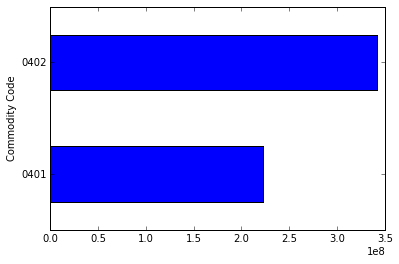

In [309]:
## Simple chart
milk_imports_grouped=milk_countries_imports.groupby('Commodity Code')
milk_imports_grouped['Trade Value (US$)'].aggregate(sum)
milk_imports_grouped['Trade Value (US$)'].aggregate(sum).plot(kind='barh')

In [310]:
## generating alternative groupings
monthlies=milk_countries_imports.groupby(['Commodity','Trade Flow','Period'])['Trade Value (US$)'].aggregate(sum)
monthlies

Commodity                                           Trade Flow  Period
Milk and cream, concentrated or sweetened           Imports     201401    30423330
                                                                201402    20614513
                                                                201403    26335257
                                                                201404    24770338
                                                                201405    26409462
                                                                201406    29081876
                                                                201407    25668642
                                                                201408    23360790
                                                                201409    37418160
                                                                201410    38012444
                                                                201411    39465351
                

The `groupby()` method *splits* the data into separate distinct groups of rows, and then the `aggregate()` method takes each group of rows from the results of the `groupby()` operation, *applies* the specified aggregation function, and then *combines* the results in the output. 

The aggregation function itself is applied to all columns of an appropriate type. In the example, the only numeric column that makes sense to aggregate over is the trade value column.

As well as built in summary operations, such as finding the total (`sum`), or maximum or minimum value in a group (`max`, `min`), aggregating functions imported from other Python packages can also be used. As shown in the next example, the `numpy` package has a function `mean` that will calculate the mean (simple average) value for a set of values.

### Generating several aggregation values at the same time
To generate several aggregate reports in a single line of code, provide a list of several aggregating operations to the `aggregate()` method:

In [311]:
from numpy import mean

GROUPING_COMMFLOWPERIOD=['Commodity','Trade Flow','Period']
milk_countries.groupby(GROUPING_COMMFLOWPERIOD)['Trade Value (US$)'].aggregate([sum, min, max, mean])

sum  \
Commodity                                          Trade Flow Period             
Milk and cream, concentrated or sweetened          Exports    201401  40215103   
                                                              201402  32298379   
                                                              201403  42987355   
                                                              201404  52900517   
                                                              201405  55987927   
                                                              201406  59594101   
                                                              201407  33370590   
                                                              201408  35080215   
                                                              201409  27320915   
                                                              201410  30387862   
                                                              201411  23417285   
                                                              201412  31301034   
                                                   Imports    201401  30423330   
                                                              201402  20614513   
                                                              201403  26335257   
                                                              201404  24770338   
                                                              201405  26409462   
                                                              201406  29081876   
                                                              201407  25668642   
                                                              201408  23360790   
                                                              201409  37418160   
                                                              201410  38012444   
                                                              201411  39465351   
                                                              201412  20217008   
Milk and cream, neither concentrated nor sweetened Exports    201401  46923551   
                                                              201402  40191337   
                                                              201403  43794069   
                                                              201404  42295261   
                                                              201405  40213208   
                                                              201406  39721799   
                                                              201407  39508126   
                                                              201408  26657488   
                                                              201409  33279378   
                                                              201410  26615555   
                                                              201411  25876673   
                                                              201412  28714207   
                                                   Imports    201401  21950746   
                                                              201402  18685554   
                                                              201403  17984197   
                                                              201404  19440269   
                                                              201405  21665662   
                                                              201406  16022428   
                                                              201407  19128109   
                                                              201408  16934043   
                                                              201409  19284385   
                                                              201410  18353099   
                                                              201411  17617864   
                                                         

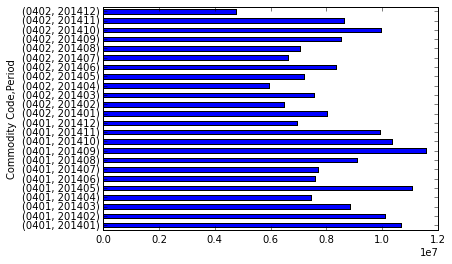

In [312]:
## visualise: plot maximums
milk_countries_imports.groupby(['Commodity Code','Period'])['Trade Value (US$)'].aggregate(max).plot(kind='barh')

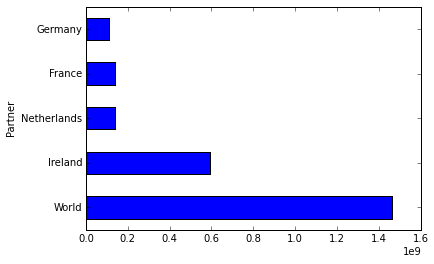

In [313]:
## sorting before plotting
milk_bypartner_total=milk.groupby(['Partner'])['Trade Value (US$)'].aggregate(sum)
milk_bypartner_total.sort('Trade Value (US$)',inplace=False,ascending=False).head(5).plot(kind='barh')
#milk_bypartner_total.order('Trade Value (US$)',ascending=False).head(5).plot(kind='barh')

## Filtering groups